# Introduction to Logistic Regression

## Import Libraries

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## Load the Dataset
 The code below loads a modified version of the iris dataset which has two classes. A 1 is a virginica flower and a 0 is versicolor flower. 

In [2]:
df = pd.read_csv(R'data\modifiedIris2Classes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


## Splitting Data into Training and Test Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [4]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

<b>Step 1:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. Typically this is where you tune C is related to regularization

In [5]:
clf = LogisticRegression()

<b>Step 2:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [6]:
clf.fit(X_train, y_train)

LogisticRegression()

<b>Step 3:</b> Making Predictions (on new flowers)

Logistic regression also allows you to see prediction probabilities as well as  a prediction. This is not like other algorithms like decision trees for classification which only give you a prediction not a probability. 

In [7]:
prediction = clf.predict(X_test[0].reshape(1, -1))
print(f"Predicted class: {prediction[0]}")

Predicted class: 0


In [8]:
probability = clf.predict_proba(X_test[0].reshape(1, -1))
print(f"Probability of class 0 (versicolor): {probability[0][0]:.2f}")
print(f"Probability of class 1 (virginica): {probability[0][1]:.2f}")

Probability of class 0 (versicolor): 0.53
Probability of class 1 (virginica): 0.47


## Model Interpretation and Visualization

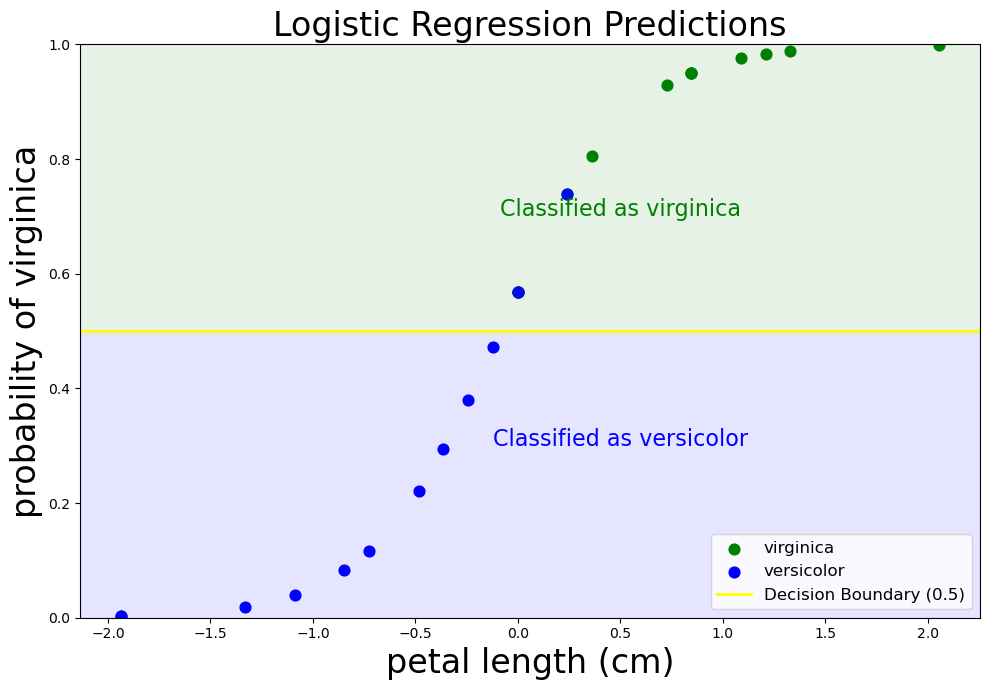

In [9]:
# Predict probabilities for the test data
logistic_preds = clf.predict_proba(X_test)[:, 1]

# Plotting code
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Scatter plot for virginica (class 1) and versicolor (class 0) based on predictions
virginica_filter = y_test == 1
versicolor_filter = y_test == 0

ax.scatter(X_test[virginica_filter], logistic_preds[virginica_filter],
           color='g', s=60, label='virginica')

ax.scatter(X_test[versicolor_filter], logistic_preds[versicolor_filter],
           color='b', s=60, label='versicolor')

# Decision boundary line
ax.axhline(y=0.5, color='yellow', linewidth=2, label="Decision Boundary (0.5)")

# Shaded regions
ax.axhspan(0.5, 1, alpha=0.1, color='green')
ax.axhspan(0, 0.4999, alpha=0.1, color='blue')

# Text labels for classification regions
ax.text(0.5, 0.7, 'Classified as virginica', fontsize=16, ha='center', color='green')
ax.text(0.5, 0.3, 'Classified as versicolor', fontsize=16, ha='center', color='blue')

# Set axis limits and labels
ax.set_ylim(0, 1)
ax.set_xlabel('petal length (cm)', fontsize=24)
ax.set_ylabel('probability of virginica', fontsize=24)
ax.set_title('Logistic Regression Predictions', fontsize=24)

# Legend
ax.legend(loc='lower right', markerscale=1.0, fontsize=12)

# Adjust layout
fig.tight_layout()
plt.show()

## Evaluating Model Performance

Let's create a confusion matrix_the most commonly used measurement for binary classification. 

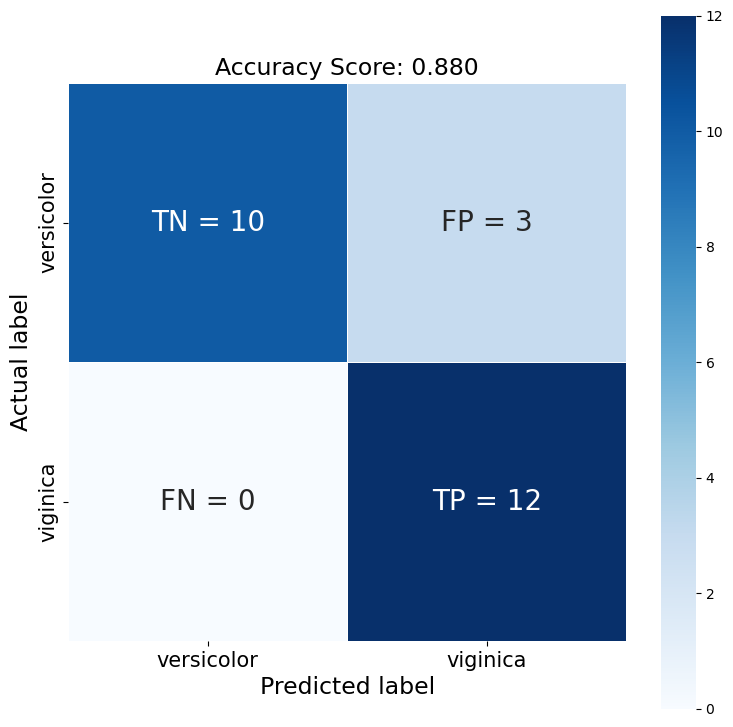

In [15]:
# Confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

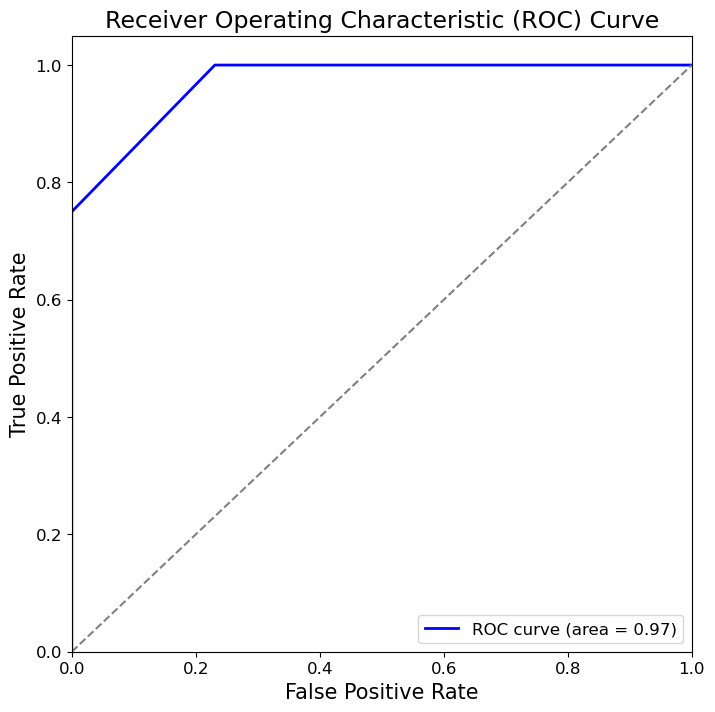

In [17]:
# Get the predicted probabilities for the positive class (class 1 - virginica)
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr) for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=17)
plt.legend(loc="lower right", fontsize=12)
plt.tick_params(labelsize=12)
plt.show()